<a href="https://colab.research.google.com/github/chetansolanke14/DeepLearning_Project/blob/master/DataSymentics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import datasets from the skillenza 

In [1]:
#!wget https://cdn.skillenza.com/files/8a6674bb-25af-475c-84b5-4f5d103593ec/training_1.csv

--2019-09-27 13:15:31--  https://cdn.skillenza.com/files/8a6674bb-25af-475c-84b5-4f5d103593ec/training_1.csv
Resolving cdn.skillenza.com (cdn.skillenza.com)... 13.32.255.149, 13.32.255.172, 13.32.255.186, ...
Connecting to cdn.skillenza.com (cdn.skillenza.com)|13.32.255.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344989 (337K) [text/csv]
Saving to: ‘training_1.csv’

training_1.csv      100%[===================>] 336.90K   520KB/s    in 0.6s    

2019-09-27 13:15:33 (520 KB/s) - ‘training_1.csv’ saved [344989/344989]



In [2]:
#!wget https://cdn.skillenza.com/files/a3344af0-f63d-43c4-a2e6-007175a6ebb2/test.csv

--2019-09-27 13:15:39--  https://cdn.skillenza.com/files/a3344af0-f63d-43c4-a2e6-007175a6ebb2/test.csv
Resolving cdn.skillenza.com (cdn.skillenza.com)... 13.32.255.149, 13.32.255.172, 13.32.255.186, ...
Connecting to cdn.skillenza.com (cdn.skillenza.com)|13.32.255.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166711 (163K) [text/csv]
Saving to: ‘test.csv’

test.csv            100%[===================>] 162.80K   333KB/s    in 0.5s    

2019-09-27 13:15:40 (333 KB/s) - ‘test.csv’ saved [166711/166711]



In [3]:
#!wget https://cdn.skillenza.com/files/08446646-a4f1-4322-84ba-c1615c385e3b/sample_submission.csv

--2019-09-27 13:15:53--  https://cdn.skillenza.com/files/08446646-a4f1-4322-84ba-c1615c385e3b/sample_submission.csv
Resolving cdn.skillenza.com (cdn.skillenza.com)... 13.32.255.149, 13.32.255.172, 13.32.255.186, ...
Connecting to cdn.skillenza.com (cdn.skillenza.com)|13.32.255.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8462 (8.3K) [text/csv]
Saving to: ‘sample_submission.csv’

sample_submission.c 100%[===================>]   8.26K  --.-KB/s    in 0s      

2019-09-27 13:15:53 (151 MB/s) - ‘sample_submission.csv’ saved [8462/8462]



Import Different libraries

In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import GridSearchCV

Read data from test train and submission

In [0]:
test = pd.read_csv('test.csv')
train = pd.read_csv('training_1.csv')
sample_Sub = pd.read_csv('sample_submission.csv')

In [265]:
test.head()

,id,text
0,3729,2705 4888 5050 5815 2472 5157 652 2117 2110 32...
1,3732,389 4978 315 5178 513 5249 5853 3267 315 3891 ...
2,3761,4478 4231 4858 2638 4231 867 371 686 4888 4179...
3,5,3015 1911 112 3905 825 337 315 1693 4677 825 5...
4,7,5136 3918 5153 2023 3091 4159 315 3711 1409 27...


In [266]:
train.head()

,id,category,text
0,959,0,5573 1189 4017 1207 4768 8542 17 1189 5085 5773
1,994,0,6315 7507 6700 4742 1944 2692 3647 4413 6700
2,995,0,5015 8067 5335 1615 7957 5773
3,996,0,2925 7199 1994 4647 7455 5773 4518 2734 2807 8...
4,997,0,7136 1207 6781 237 4971 3669 6193


In [267]:
sample_Sub.head()

,id,category
0,3729,1
1,3732,1
2,3761,1
3,5,1
4,7,1


In [268]:
train['text'].iloc[22]

'5092 3225 8486 5658 6625 1784 3078 7152 3743 7812 3078 1273 1089 5071 5085 3078'

In [269]:
train['category'].value_counts()

0    3348
1     116
Name: category, dtype: int64

In [0]:
from nltk import FreqDist
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

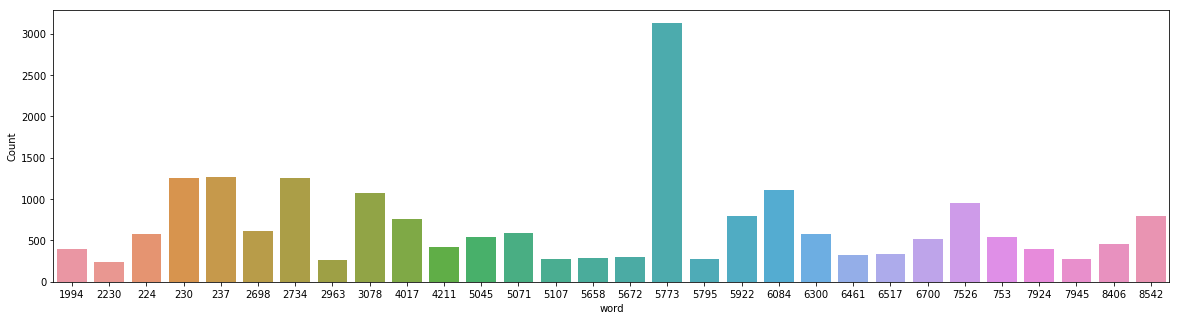

In [330]:
freq_words(train['text'])

Create different function

In [0]:
def get_csv_file(model,file_name):
    predicted_test = model.predict(test.text)
    test['category'] = predicted_test
    final_test = test[['id','category']]
    final_test.to_csv(file_name,index=False)

In [0]:
def get_reports(model,df_test,y_test):
    predicted = model.predict(df_test)
    print('='*90)
    print('classification_report')
    print(classification_report(y_test,predicted))

    print('='*90)
    print('confusion_matrix')
    print(confusion_matrix(y_test,predicted))

    print('='*90)
    print('accuracy_score')
    print(accuracy_score(y_test,predicted))

    print('='*90)
    print('F1 Score')
    print(f1_score(y_test,predicted))

In [0]:
def model_pipe(model, dtrain,label):
  clf_model = Pipeline([('vect',  CountVectorizer()),
                        ('tfidf', TfidfTransformer()),
                        ('clf', model),])
  clf_model = clf_model.fit(dtrain,label)
  return clf_model

In [0]:
count_vectorizer = CountVectorizer()
X =count_vectorizer.fit_transform(train['text'].values)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(train.text, train.category, test_size=0.20, random_state=42)

In [0]:
clf = MultinomialNB(X_train_tfidf, train.category)

In [0]:
model_clf=model_pipe(MultinomialNB(),X_train,y_train)

In [278]:
get_reports(model_clf, X_test,y_test)

classification_report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       676
           1       1.00      0.06      0.11        17

    accuracy                           0.98       693
   macro avg       0.99      0.53      0.55       693
weighted avg       0.98      0.98      0.97       693

confusion_matrix
[[676   0]
 [ 16   1]]
accuracy_score
0.976911976911977
F1 Score
0.1111111111111111


In [0]:
model_clf=model_pipe(SGDClassifier(),X_train,y_train)

In [280]:
get_reports(model_clf, X_test,y_test)

classification_report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       676
           1       1.00      0.76      0.87        17

    accuracy                           0.99       693
   macro avg       1.00      0.88      0.93       693
weighted avg       0.99      0.99      0.99       693

confusion_matrix
[[676   0]
 [  4  13]]
accuracy_score
0.9942279942279942
F1 Score
0.8666666666666666


In [0]:
model_rf_clf=model_pipe(RandomForestClassifier(n_estimators=6,criterion='gini'),X_train,y_train)

In [318]:
get_reports(model_rf_clf, X_test,y_test)

classification_report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       676
           1       1.00      0.35      0.52        17

    accuracy                           0.98       693
   macro avg       0.99      0.68      0.76       693
weighted avg       0.98      0.98      0.98       693

confusion_matrix
[[676   0]
 [ 11   6]]
accuracy_score
0.9841269841269841
F1 Score
0.5217391304347826


In [0]:
get_csv_file(model_rf_clf,'submission_rf.csv')

In [0]:
model_gbm_clf=model_pipe(GradientBoostingClassifier(learning_rate=1, min_samples_split=1000,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10),X_train,y_train)

In [294]:
get_reports(model_gbm_clf, X_test,y_test)

classification_report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       676
           1       0.70      0.41      0.52        17

    accuracy                           0.98       693
   macro avg       0.84      0.70      0.75       693
weighted avg       0.98      0.98      0.98       693

confusion_matrix
[[673   3]
 [ 10   7]]
accuracy_score
0.9812409812409812
F1 Score
0.5185185185185185


In [0]:
get_csv_file(model_rf_clf,'submission_gbm.csv')

In [0]:
get_csv_file(gs_clf_svm, 'submission_gsSVM.csv')

In [0]:
rf_model = Pipeline([('vect',  CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                     ('rf_model', RandomForestClassifier(n_estimators=5,criterion='entropy')),])

In [148]:
rf_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='entropy', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=

In [149]:
get_reports(rf_model,X_test,y_test)

classification_report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       695
           1       0.99      1.00      1.00       645

    accuracy                           1.00      1340
   macro avg       1.00      1.00      1.00      1340
weighted avg       1.00      1.00      1.00      1340

confusion_matrix
[[691   4]
 [  0 645]]
accuracy_score
0.9970149253731343
F1 Score
0.9969088098918084


In [0]:
y_1 = [y_1 for y_1 in y_train if y_1 == 1]
y_0 = [y_0 for y_0 in y_train if y_0 == 0]

In [135]:
print(len(y_1))
print(len(y_0))

2703
2653


In [0]:
from sklearn.utils import resample
# separate minority and majority classes
t_0 = train[train.category==0]
t_1 = train[train.category==1]

# upsample minority
t_upsampled = resample(t_1,
                          replace=True, # sample with replacement
                          n_samples=len(t_0), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([t_0, t_upsampled])

In [195]:
upsampled.describe()

,id,category
count,6696.000000,6696.000000
mean,3715.952957,0.500000
std,1137.335749,0.500037
min,959.000000,0.000000
25%,2905.750000,0.000000
50%,4229.000000,0.500000
75%,4576.000000,1.000000
max,4855.000000,1.000000


In [0]:
X_train, X_test, y_train, y_test = train_test_split(upsampled.text, upsampled.category, test_size=0.20, random_state=42)

In [151]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
from sklearn.svm import SVC

In [177]:
get_reports(text_clf_svm,X_test,y_test)

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       676
           1       1.00      1.00      1.00        17

    accuracy                           1.00       693
   macro avg       1.00      1.00      1.00       693
weighted avg       1.00      1.00      1.00       693

confusion_matrix
[[676   0]
 [  0  17]]
accuracy_score
1.0
F1 Score
1.0


In [0]:
y_1 = [y_1 for y_1 in y_test if y_1 == 1]
y_0 = [y_0 for y_0 in y_test if y_0 == 0]

In [209]:
print(len(y_1),len(y_0))

645 695


In [0]:
get_csv_file(text_clf_svm, 'submission_svm1.csv')

In [181]:
train['category'].value_counts(normalize = True)

0    0.966513
1    0.033487
Name: category, dtype: float64

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lreg = LogisticRegression()

In [197]:
text_clf_lr = Pipeline([('vect', CountVectorizer()),
                         ('tfidf',TfidfTransformer()),
                         ('clf_lr',LogisticRegression(class_weight='balanced'))])
text_clf_lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf_lr',
                 LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scali

In [198]:
get_reports(text_clf_lr, X_test,y_test)

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       695
           1       1.00      1.00      1.00       645

    accuracy                           1.00      1340
   macro avg       1.00      1.00      1.00      1340
weighted avg       1.00      1.00      1.00      1340

confusion_matrix
[[692   3]
 [  0 645]]
accuracy_score
0.9977611940298508
F1 Score
0.9976798143851509


In [0]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.model_selection import cross_val_score,GridSearchCV   #Additional scklearn functions
  #Perforing grid search

In [0]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in ['category']]
gbm0 = GradientBoostingClassifier(random_state=10)

In [250]:
text_clf_gbm = Pipeline([('vect', CountVectorizer()),
                         ('tfidf',TfidfTransformer()),
                         ('clf_lr',GradientBoostingClassifier(learning_rate=0.01, min_samples_split=1000,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10))])
text_clf_gbm.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                                            learning_rate=0.01, loss='deviance',
                                            max_depth=8, max_features='sqrt',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                         

In [251]:
get_reports(text_clf_gbm,X_test,y_test)

classification_report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       695
           1       0.99      0.94      0.97       645

    accuracy                           0.97      1340
   macro avg       0.97      0.97      0.97      1340
weighted avg       0.97      0.97      0.97      1340

confusion_matrix
[[691   4]
 [ 38 607]]
accuracy_score
0.9686567164179104
F1 Score
0.9665605095541402


In [0]:
get_csv_file(text_clf_gbm, 'submision_gbm.csv')

In [0]:
sub_1 = pd.read_csv('submission_rf.csv')

In [0]:
sub_2 = pd.read_csv('submision_gbm2.csv')

In [322]:
print(confusion_matrix(sub_1.category.values, sub_2.category.values))

[[1360]]


In [298]:
sub_1['category'].value_counts()

0    1360
Name: category, dtype: int64

In [299]:
sub_2['category'].value_counts()

0    1360
Name: category, dtype: int64